In [8]:
import numpy as np
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm

import scipy.stats

In [9]:
df = pd.read_csv('./pitching_data_1996_2019.csv')
df.head()

starters = df[df["GS"] >= 3]
relievers = df[(df["GS"] < 3) & (df["SV"] <= 5)]
closers = df[df["SV"] > 5]

In [10]:
#group by player age, get batting avg
relievers_age = relievers[['Age', 'G', 'GS', 'IP', 'W', 'ER', 'SV', 'SO', 'WHIP', 'BB', 'H']].groupby(['Age'], as_index=False).sum()

relievers_age['SO_PER_G'] = relievers_age['SO'] / relievers_age['G']
relievers_age['AVG_ERA'] = 9 * (relievers_age['ER'] / relievers_age['IP'])
relievers_age['AVG_WHIP'] = (relievers_age['BB'] + relievers_age['H']) / relievers_age['IP']
relievers_age['IP_PER_G'] = relievers_age['IP'] / relievers_age['G']

relievers_age['DELTA_SO_PER_G'] = 0.0
relievers_age['PREV_SO_PER_G'] = 0.0
relievers_age['SO_PER_G_PERCENT_CHANGE'] = 0.0

relievers_age['DELTA_ERA'] = 0.0
relievers_age['PREV_ERA'] = 0.0
relievers_age['ERA_PERCENT_CHANGE'] = 0.0

relievers_age['DELTA_WHIP'] = 0.0
relievers_age['PREV_WHIP'] = 0.0
relievers_age['WHIP_PERCENT_CHANGE'] = 0.0

relievers_age['DELTA_IP_PER_G'] = 0.0
relievers_age['PREV_IP_PER_G'] = 0.0
relievers_age['IP_PER_G_PERCENT_CHANGE'] = 0.0

In [11]:
for i, r in relievers_age.iterrows():
    if i != 0:
        relievers_age.at[i,'DELTA_SO_PER_G'] = relievers_age.at[i,'SO_PER_G'] - relievers_age.at[i-1,'SO_PER_G']
        relievers_age.at[i,'PREV_SO_PER_G'] = relievers_age.at[i-1,'SO_PER_G']
        relievers_age.at[i,'SO_PER_G_PERCENT_CHANGE'] = relievers_age.at[i,'DELTA_SO_PER_G']/relievers_age.at[i,'PREV_SO_PER_G']
        
        relievers_age.at[i,'DELTA_ERA'] = relievers_age.at[i,'AVG_ERA'] - relievers_age.at[i-1,'AVG_ERA']
        relievers_age.at[i,'PREV_ERA'] = relievers_age.at[i-1,'AVG_ERA']
        relievers_age.at[i,'ERA_PERCENT_CHANGE'] = relievers_age.at[i,'DELTA_ERA']/relievers_age.at[i,'PREV_ERA']
        
        relievers_age.at[i,'DELTA_WHIP'] = relievers_age.at[i,'AVG_WHIP'] - relievers_age.at[i-1,'AVG_WHIP']
        relievers_age.at[i,'PREV_WHIP'] = relievers_age.at[i-1,'AVG_WHIP']
        relievers_age.at[i,'WHIP_PERCENT_CHANGE'] = relievers_age.at[i,'DELTA_WHIP']/relievers_age.at[i,'PREV_WHIP']
        
        relievers_age.at[i,'DELTA_IP_PER_G'] = relievers_age.at[i,'IP_PER_G'] - relievers_age.at[i-1,'IP_PER_G']
        relievers_age.at[i,'PREV_IP_PER_G'] = relievers_age.at[i-1,'IP_PER_G']
        relievers_age.at[i,'IP_PER_G_PERCENT_CHANGE'] = relievers_age.at[i,'DELTA_IP_PER_G']/relievers_age.at[i,'PREV_IP_PER_G']
        
relievers_age.head()

,Age,G,GS,IP,W,ER,SV,SO,WHIP,BB,...,SO_PER_G_PERCENT_CHANGE,DELTA_ERA,PREV_ERA,ERA_PERCENT_CHANGE,DELTA_WHIP,PREV_WHIP,WHIP_PERCENT_CHANGE,DELTA_IP_PER_G,PREV_IP_PER_G,IP_PER_G_PERCENT_CHANGE
0,19,25,0,33.2,1,20,0,27,1.78,24,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,20,151,4,193.7,7,96,6,193,11.55,97,...,0.183468,-0.961181,5.421687,-0.177284,-0.372020,1.807229,-0.205851,-0.045219,1.328000,-0.034050
2,21,846,9,1058.2,60,444,22,967,39.32,533,...,-0.105715,-0.684282,4.460506,-0.153409,-0.052673,1.435209,-0.036700,-0.031954,1.282781,-0.024910
3,22,2812,38,3238.5,180,1494,41,3019,124.82,1537,...,-0.060727,0.375698,3.776224,0.099491,0.033243,1.382536,0.024045,-0.099156,1.250827,-0.079272
4,23,5934,41,6551.0,352,2889,94,5940,245.01,3009,...,-0.067624,-0.182910,4.151922,-0.044054,-0.044080,1.415779,-0.031135,-0.047694,1.151671,-0.041413


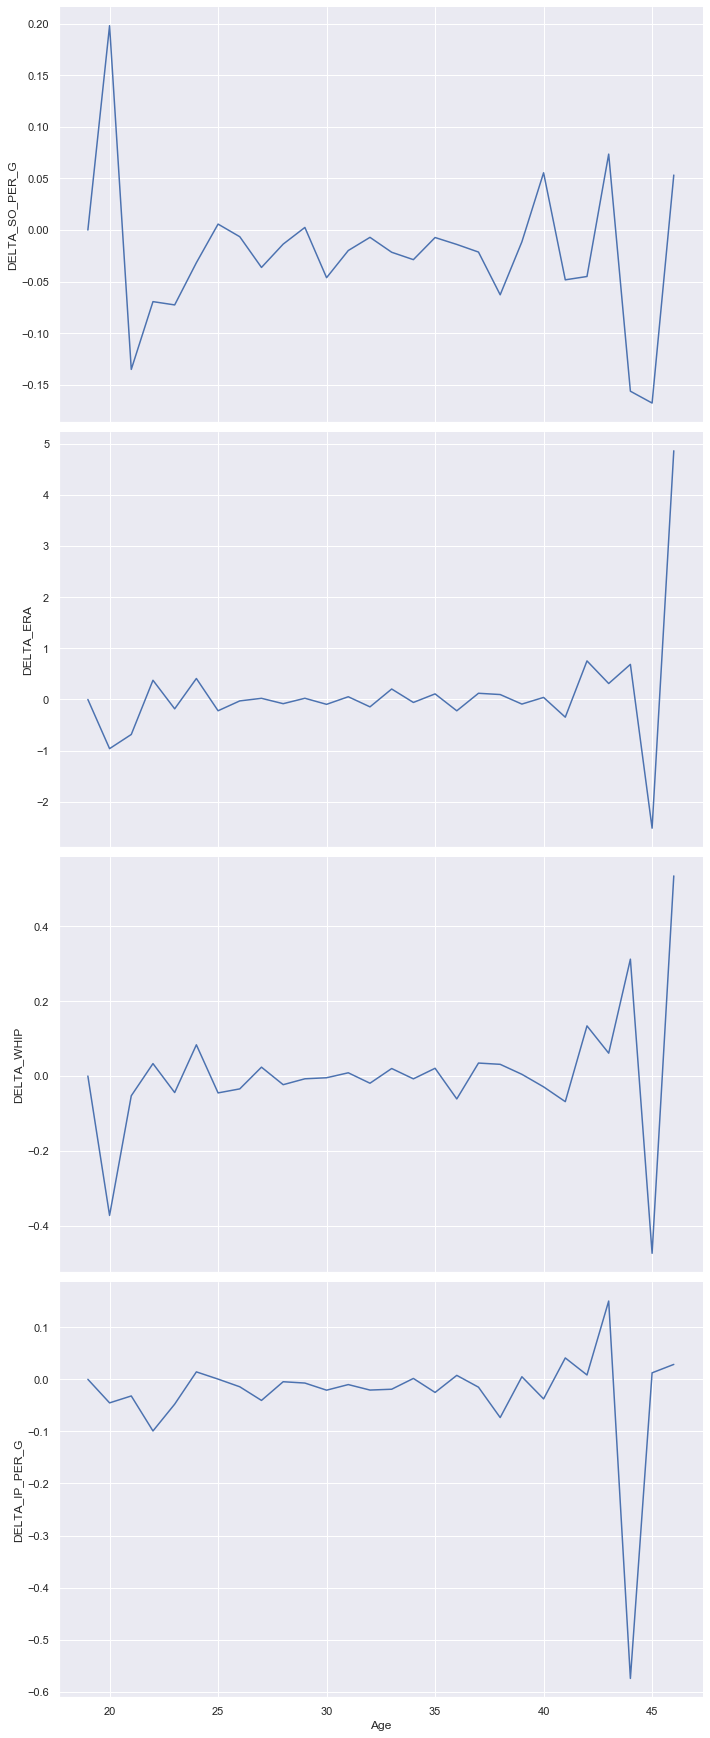

In [12]:
# explore delta of avg by age 
g = sns.PairGrid(relievers_age, y_vars=["DELTA_SO_PER_G","DELTA_ERA","DELTA_WHIP","DELTA_IP_PER_G"], x_vars=["Age"], height=6, aspect = 1.6)
g.map(sns.lineplot, markers=True)

In [15]:
# explore percent change by age and previous season's stat
df2 = relievers[['key_mlbam', 'Age', 'G', 'GS', 'IP', 'W', 'ERA', 'ER', 'SV', 'SO', 'WHIP', 'BB', 'H']]
df2['SO_PER_G'] = df2['SO'] / df2['G']
df2['IP_PER_G'] = df2['IP'] / df2['G']

df2['DELTA_SO_PER_G'] = float("NaN")
df2['PREV_SO_PER_G'] = float("NaN")
df2['SO_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_ERA'] = float("NaN")
df2['PREV_ERA'] = float("NaN")
df2['ERA_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_WHIP'] = float("NaN")
df2['PREV_WHIP'] = float("NaN")
df2['WHIP_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_IP_PER_G'] = float("NaN")
df2['PREV_IP_PER_G'] = float("NaN")
df2['IP_PER_G_PERCENT_CHANGE'] = float("NaN")

for i, r in df2.iterrows():
    prev = df2[ (df2.key_mlbam==r.key_mlbam) & (df2['Age']==(r['Age']-1)) ]

    if len(prev)==1:        
        df2.at[i,'DELTA_SO_PER_G'] = r.SO_PER_G - prev.SO_PER_G
        df2.at[i,'PREV_SO_PER_G'] = prev.SO_PER_G
        df2.at[i,'SO_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_SO_PER_G']/df2.at[i,'PREV_SO_PER_G']
        
        df2.at[i,'DELTA_ERA'] = r.ERA - prev.ERA
        df2.at[i,'PREV_ERA'] = prev.ERA
        df2.at[i,'ERA_PERCENT_CHANGE'] = df2.at[i,'DELTA_ERA']/df2.at[i,'PREV_ERA']
        
        df2.at[i,'DELTA_WHIP'] = r.WHIP - prev.WHIP
        df2.at[i,'PREV_WHIP'] = prev.WHIP
        df2.at[i,'WHIP_PERCENT_CHANGE'] = df2.at[i,'DELTA_WHIP']/df2.at[i,'PREV_WHIP']
        
        df2.at[i,'DELTA_IP_PER_G'] = r.IP_PER_G - prev.IP_PER_G
        df2.at[i,'PREV_IP_PER_G'] = prev.IP_PER_G
        df2.at[i,'IP_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_IP_PER_G']/df2.at[i,'PREV_IP_PER_G']

# remove any rows where we dont have previous season data...ex: a player's first season
df2.dropna(axis=0, how='any', inplace=True)
df2.head()

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is tr

,key_mlbam,Age,G,GS,IP,W,ERA,ER,SV,SO,...,SO_PER_G_PERCENT_CHANGE,DELTA_ERA,PREV_ERA,ERA_PERCENT_CHANGE,DELTA_WHIP,PREV_WHIP,WHIP_PERCENT_CHANGE,DELTA_IP_PER_G,PREV_IP_PER_G,IP_PER_G_PERCENT_CHANGE
851,429783,32,68,0,79.1,5,1.47,13,3,80,...,0.225490,-2.34,3.81,-0.614173,-0.35,1.11,-0.315315,0.039235,1.124000,0.034907
852,124805,28,76,0,87.0,4,2.28,22,3,122,...,0.936508,-1.12,3.40,-0.329412,-0.23,1.37,-0.167883,0.485526,0.659211,0.736527
1003,124171,28,68,0,84.0,11,2.36,22,5,84,...,0.012536,-2.07,4.43,-0.467269,-0.40,1.34,-0.298507,0.015294,1.220000,0.012536
1075,121125,32,66,0,69.2,10,2.33,18,2,81,...,0.049836,0.61,1.72,0.354651,-0.02,0.85,-0.023529,0.090738,0.957746,0.094742
1307,115629,30,74,0,77.1,9,1.86,16,2,75,...,0.045689,-0.27,2.13,-0.126761,0.12,0.97,0.123711,-0.190416,1.232308,-0.154520


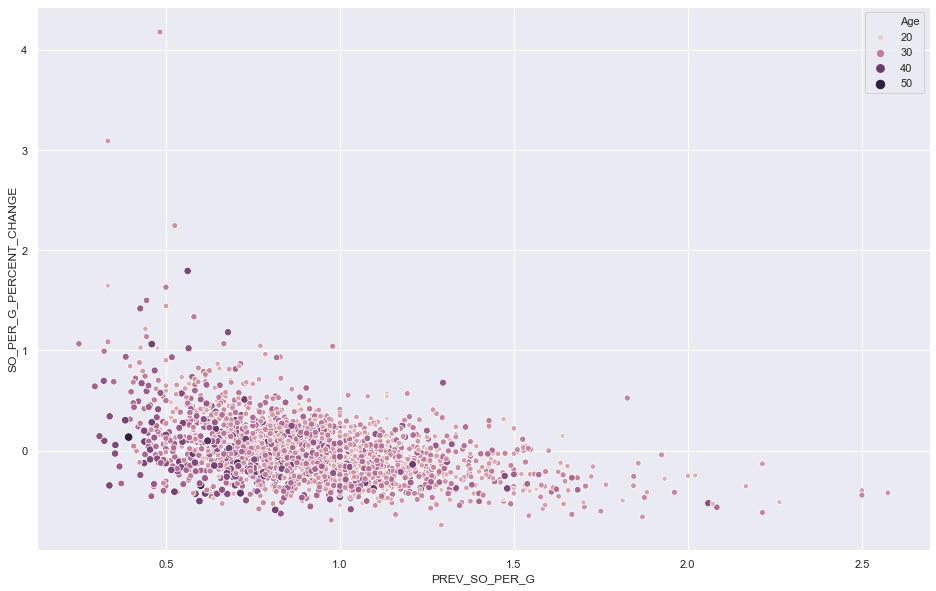

In [16]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_SO_PER_G", y="SO_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


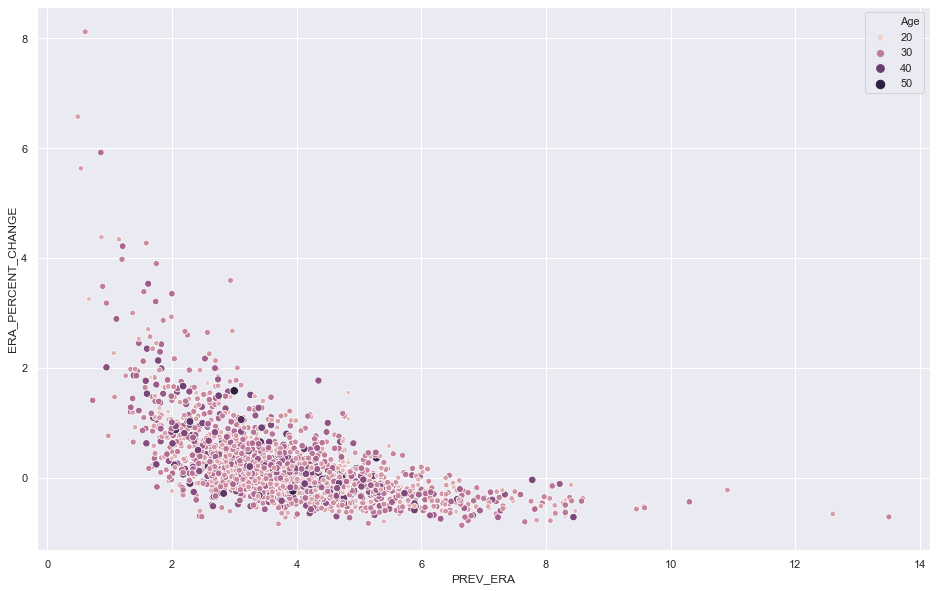

In [17]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_ERA", y="ERA_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


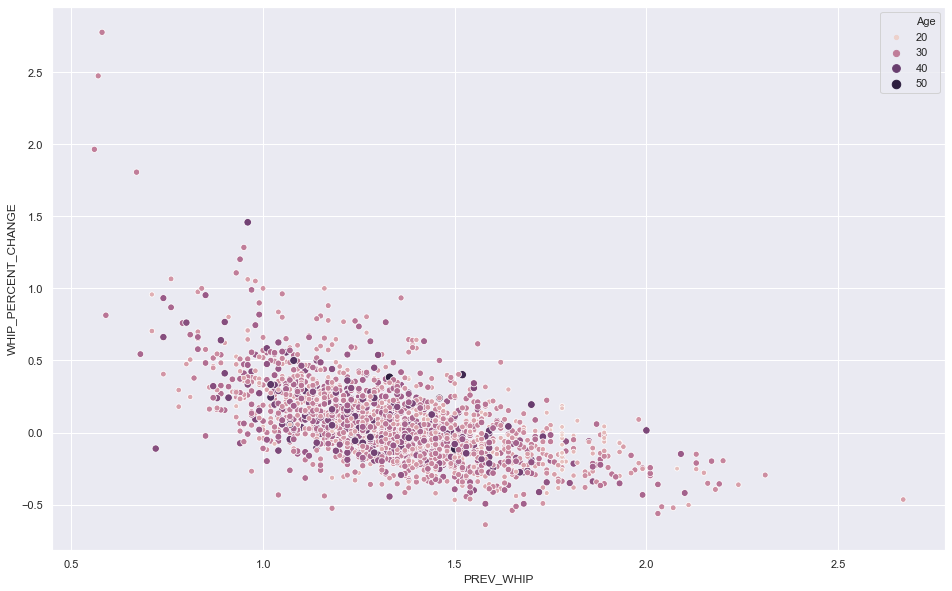

In [18]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_WHIP", y="WHIP_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


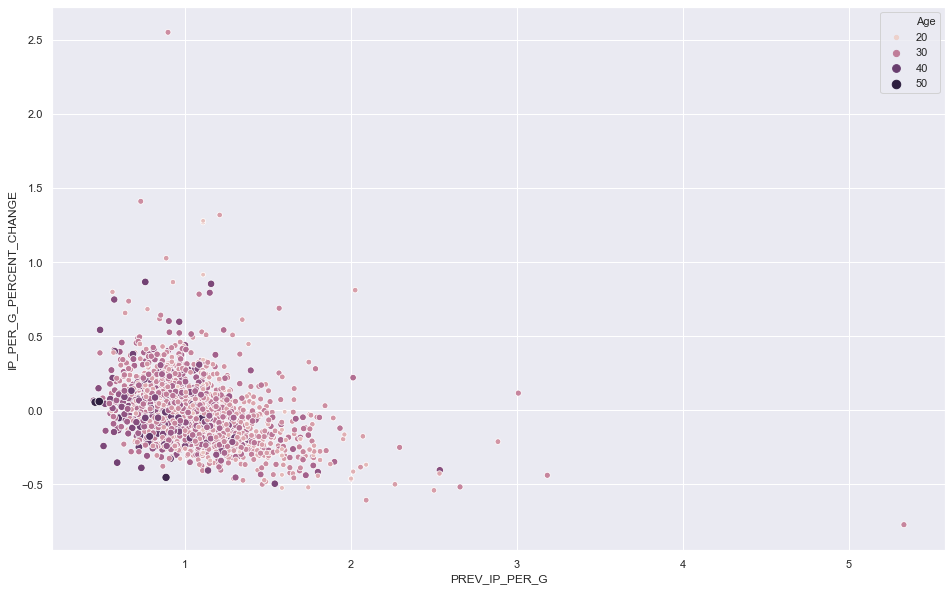

In [19]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_IP_PER_G", y="IP_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')

In [20]:
mod_kpg = sm.ols(formula="SO_PER_G_PERCENT_CHANGE ~ Age + PREV_SO_PER_G", data=df2[df2.PREV_SO_PER_G > 0]).fit()
print(mod_kpg.summary())

mod_era = sm.ols(formula="ERA_PERCENT_CHANGE ~ Age + PREV_ERA", data=df2[df2.PREV_ERA > 0]).fit()
print(mod_era.summary())

mod_whip = sm.ols(formula="WHIP_PERCENT_CHANGE ~ Age + PREV_WHIP", data=df2[df2.PREV_WHIP > 0]).fit()
print(mod_whip.summary())

mod_ip_per_g = sm.ols(formula="IP_PER_G_PERCENT_CHANGE ~ Age + PREV_IP_PER_G", data=df2[df2.PREV_IP_PER_G > 0]).fit()
print(mod_ip_per_g.summary())

                               OLS Regression Results                              
Dep. Variable:     SO_PER_G_PERCENT_CHANGE   R-squared:                       0.205
Model:                                 OLS   Adj. R-squared:                  0.204
Method:                      Least Squares   F-statistic:                     258.6
Date:                     Mon, 23 Mar 2020   Prob (F-statistic):          1.14e-100
Time:                             17:19:17   Log-Likelihood:                -386.01
No. Observations:                     2014   AIC:                             778.0
Df Residuals:                         2011   BIC:                             794.8
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [21]:
def determine_change_prob(stat, predicted, age, prev, data, mod):
    ## predicted_avg:  predicted batting average for upcoming season.  
    ##                 Probability of at least this batting average occuring will be returned.
    ##
    ## age:  integer value, age of player in current season
    ## prev_avg: float, previous season's batting average for player
    ## data: pandas dataframe of all observations that trained model
    ## mod: any linear regression statsmodel with a predict function that takes in a pandas dataframe
    
    percent_change = (predicted-prev)/prev
    prev_stat_name = 'PREV_{0}'.format(stat)
    
    ind = ['Age', prev_stat_name]
    row = [age, prev] 

    # create Pandas Series with defined indexes 
    x = pd.Series(row, index = ind) 

    avg_age = np.mean(data['Age'])
    # might need to change how to get previous season's batting average among all players
    avg_prev_avg = np.mean(data[prev_stat_name])
    
    model_mu = mod.predict(x)
    cov = np.cov(df2['Age'],data[prev_stat_name])[0][1]
    ## formula for model variance here https://link.springer.com/content/pdf/bbm%3A978-0-585-25657-3%2F1.pdf
    model_var = mod.params[1]**2 * np.var(data['Age']) + mod.params[2]**2 * np.var(data[prev_stat_name]) + 2*mod.params[1]*mod.params[2]*cov
    model_std = np.sqrt(model_var)
    
    if stat in ['ERA', 'WHIP']:
        prob = scipy.stats.norm(model_mu, model_std).cdf(percent_change)[0]
    else:
        prob = 1-scipy.stats.norm(model_mu, model_std).cdf(percent_change)[0]
        
    return prob, percent_change, predicted


In [22]:
determine_change_prob('SO_PER_G', 0.85, 26, 0.8, df2[df2.PREV_SO_PER_G > 0], mod_kpg)

(0.6201905677691126, 0.06249999999999992, 0.85)